In [ ]:
!!pip3 install transformers

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting transformers',
 '  Downloading transformers-4.19.2-py3-none-any.whl (4.2 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 22.3 MB/s eta 0:00:01',
 '\x1b[K     |▏                               | 20 kB 22.3 MB/s eta 0:00:01',
 '\x1b[K     |▎                               | 30 kB 19.9 MB/s eta 0:00:01',
 '\x1b[K     |▎                               | 40 kB 16.0 MB/s eta 0:00:01',
 '\x1b[K     |▍                               | 51 kB 8.1 MB/s eta 0:00:01',
 '\x1b[K     |▌                               | 61 kB 9.5 MB/s eta 0:00:01',
 '\x1b[K     |▌                               | 71 kB 9.2 MB/s eta 0:00:01',
 '\x1b[K     |▋                               | 81 kB 9.1 MB/s eta 0:00:01',
 '\x1b[K     |▊                               | 92 kB 10.0 MB/s eta 0:00:01',
 '\x1b[K     |▉                               | 102 kB 8.8 MB/s eta 0:00:01',
 '\x1b[K     |▉

In [ ]:
import transformers

In [ ]:
from transformers import BertTokenizer, TFBertModel
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bmodel = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_tokenizer.tokenize("These are the BEST treats for training and rewarding your dog for being good while grooming.  Lower in calories and loved by all the doggies.  Sweet potatoes seem to be their favorite Wet Noses treat!")

['these',
 'are',
 'the',
 'best',
 'treats',
 'for',
 'training',
 'and',
 'reward',
 '##ing',
 'your',
 'dog',
 'for',
 'being',
 'good',
 'while',
 'groom',
 '##ing',
 '.',
 'lower',
 'in',
 'cal',
 '##ories',
 'and',
 'loved',
 'by',
 'all',
 'the',
 'dogg',
 '##ies',
 '.',
 'sweet',
 'potatoes',
 'seem',
 'to',
 'be',
 'their',
 'favorite',
 'wet',
 'noses',
 'treat',
 '!']

In [ ]:
bert_tokenizer.tokenize("I loved this product")

['i', 'loved', 'this', 'product']

In [ ]:
bert_tokenizer.encode("I loved this product", add_special_tokens=False)

[1045, 3866, 2023, 4031]

In [ ]:
bert_tokenizer.encode("[CLS]", add_special_tokens=False)

[101]

In [ ]:
bert_tokenizer.encode("[CLS] I loved this product [SEP]", add_special_tokens=False)

[101, 1045, 3866, 2023, 4031, 102]

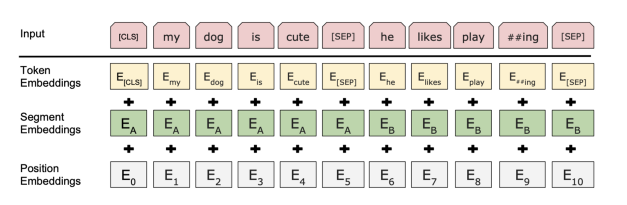

In [ ]:
from IPython.display import Image
Image('bert2.png')    # source: Devlin BERT paper

In [ ]:
sentence = "I loved this product"

encoded = bert_tokenizer.encode_plus(
        text=sentence,
        add_special_tokens=True,
        max_length=12,
        pad_to_max_length=True,
        return_tensors="tf"
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded

{'input_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=
array([[ 101, 1045, 3866, 2023, 4031,  102,    0,    0,    0,    0,    0,
           0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
bmodel(encoded["input_ids"])

TFBaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                                 <tf.Tensor: shape=(1, 12, 768), dtype=float32, numpy=
                                                 array([[[-0.11578786, -0.32231322,  0.21601824, ..., -0.11711916,
                                                           0.70965785, -0.04580506],
                                                         [ 0.26513562,  0.08365613,  0.4771297 , ..., -0.15618914,
                                                           1.1343931 , -0.00479961],
                                                         [ 1.3098797 ,  0.3309495 ,  0.69798815, ...,  0.2864421 ,
                                                           0.4180026 ,  0.04407372],
                                                         ...,
                                                         [ 0.18662569, -0.6581588 ,  0.88542515, ..., -0.49885517,
                                                  

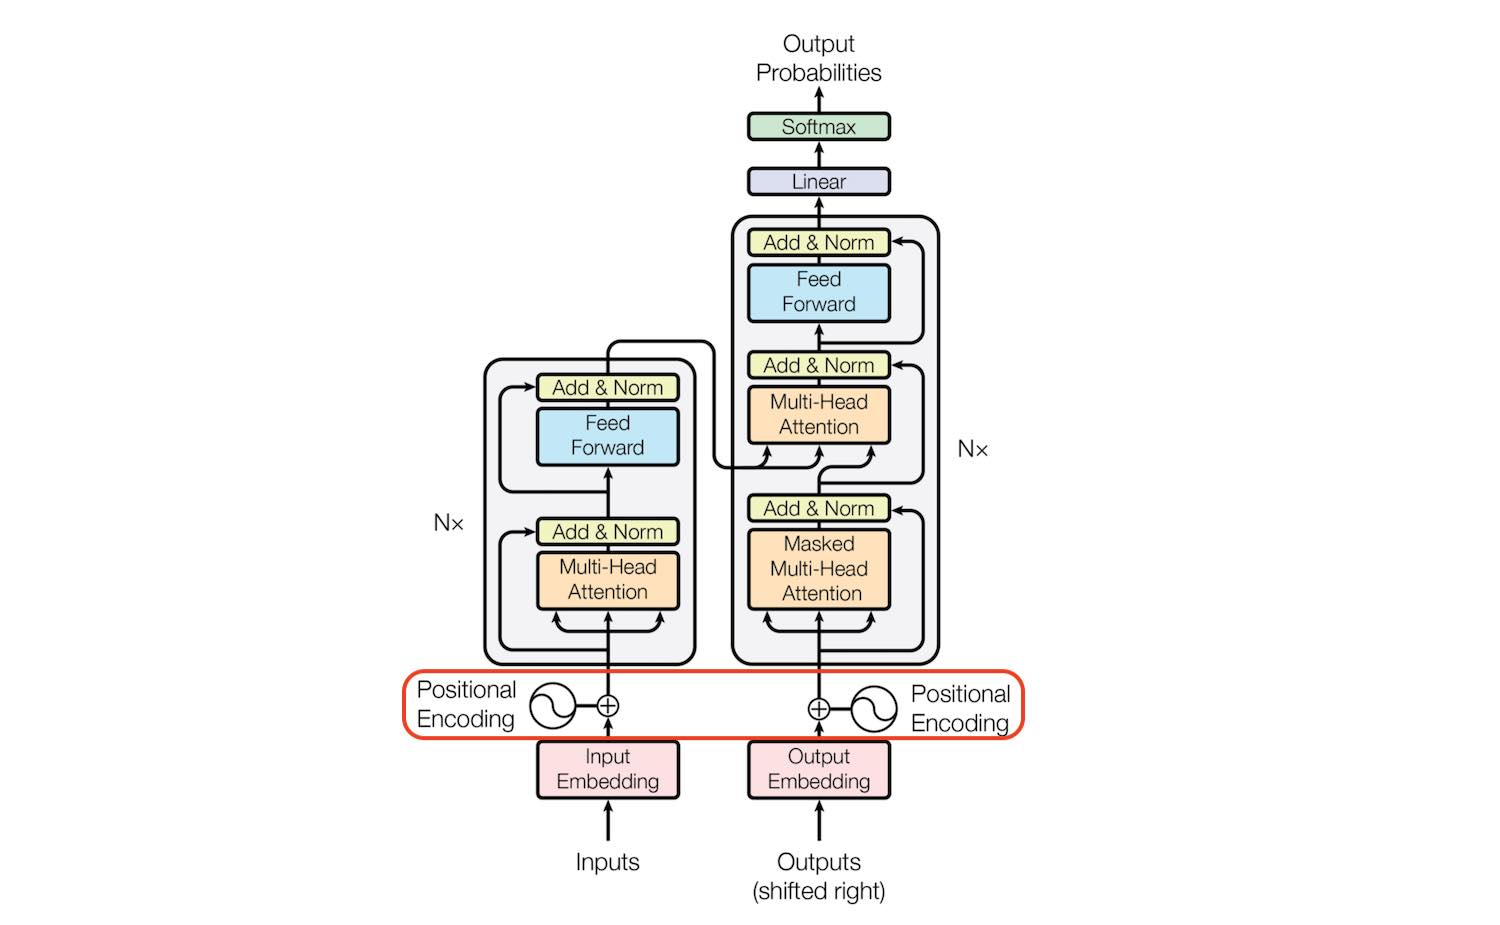

In [ ]:
from IPython.display import Image
Image('bert1.jpg')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.utils import shuffle

In [ ]:
df=pd.read_csv('Reviews.csv',index_col='Id')

In [ ]:
pos_rev=df[df['Score']>3]
neg_rev=df[df['Score']<3]

In [ ]:
def preprocess(sentence):
    result=[]
    sentence = sentence.lower()
    sentence = sentence.replace("<br />", " ").replace("<a ", " ").replace("</a>", " ")
    sentence = sentence.replace("?", " ?").replace("!", " !")
    tokens = sentence.split()
    for token in tokens:
        token = token.strip(",;.-<>()[]")
        result.append(token)
    return " ".join(result)

In [ ]:
pos_revs=[]
for sent in pos_rev['Text']:
  sent = preprocess(sent)
  pos_revs.append(sent)

neg_revs=[]
for sent in neg_rev['Text']:
  sent = preprocess(sent)
  neg_revs.append(sent)

In [ ]:
classes = [1] * len(pos_revs) + [0] *  len(neg_revs)

In [ ]:
all_revs = pos_revs + neg_revs

In [ ]:
all_revs, classes = shuffle(all_revs, classes, random_state=42)

In [ ]:
all_revs[0], classes[0]

('this is one of the best coffees i have ever had for my keurig it is a nice smooth coffee and the price is the best price i could find i will be buying more',
 1)

In [ ]:
input_ids=[]
attention_masks=[]

for sent in all_revs:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =300,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
classes=np.array(classes)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids[0]

array([  101,  2023,  2003,  2028,  1997,  1996,  2190,  4157,  2015,
        1045,  2031,  2412,  2018,  2005,  2026, 17710,  9496,  2290,
        2009,  2003,  1037,  3835,  5744,  4157,  1998,  1996,  3976,
        2003,  1996,  2190,  3976,  1045,  2071,  2424,  1045,  2097,
        2022,  9343,  2062,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
attention_masks[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
MAX_LEN=300

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
import keras
import tensorflow

In [ ]:
word_ids = Input(shape=(MAX_LEN,), dtype="int32")
#attention_masks = Input(shape=(MAX_LEN,), dtype="int32")
bert_output = bmodel(word_ids)
sent_embedding = bert_output[1]
flabel = Dense(units=1, activation="sigmoid")(sent_embedding)
model = Model(inputs=word_ids, outputs=flabel)

In [ ]:
#adam = tensorflow.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history=model.fit(input_ids, classes, batch_size=1,epochs=1)

  814/18350 [>.............................] - ETA: 21:28:01 - loss: 0.5903 - accuracy: 0.7862